# Lab5

Ознайомитися з методами регресійного аналізу, навчитися працювати з реальними і штучно створеними наборами даних для класифікації, застосовувати моделі для класифікації даних та аналізувати результати.

1. Створити набір даних за допомогою DatasetGenetator.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

noise = 6

data_array = {
    'X': np.arange(0, 1000, 15),
    'y': np.arange(0, 1000, 15)
}

gen_data = pd.DataFrame(data_array)

gen_data['X'] += np.random.normal(0, noise, size=gen_data['X'].shape)
gen_data['y'] += np.random.normal(0, noise, size=gen_data['y'].shape)

X_gen = gen_data[['X']]
y_gen = gen_data['y']

2. Завантажити набір даних для регресії з сайту Kaggle. Кожен студент має обрати унікальний набір даних.

In [25]:
keggle_data_train = pd.read_csv('data/train.csv')

keggle_data_test = pd.read_csv('data/test.csv')

keggle_data_train = keggle_data_train.dropna()

keggle_data_train.head()

X_kaggle_train = keggle_data_train[['x']]
y_kaggle_train = keggle_data_train['y']

X_kaggle_test = keggle_data_test[['x']]
y_kaggle_test = keggle_data_test['y']

3. Провести моделювання для отриманих наборів даних з використанням регресійного аналізу.

- для згенерованих даних

Середньоквадратична похибка (MSE): 86.94147435063589
Середня абсолютна похибка (MAE): 7.086493659155863
Коефіцієнт детермінації (R^2): 0.9989689444852368


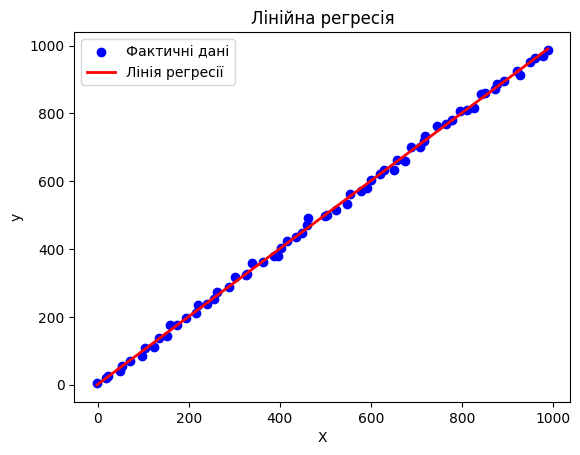

In [20]:
gen_data_model = LinearRegression()

gen_data_model.fit(X_gen, y_gen)
y_gen_pred = gen_data_model.predict(X_gen)

mse = mean_squared_error(y_gen, y_gen_pred)
mae = mean_absolute_error(y_gen, y_gen_pred)
r2 = r2_score(y_gen, y_gen_pred)

print(f"Середньоквадратична похибка (MSE): {mse}")
print(f"Середня абсолютна похибка (MAE): {mae}")
print(f"Коефіцієнт детермінації (R^2): {r2}")

plt.scatter(X_gen, y_gen, color='blue', label='Фактичні дані')
plt.plot(X_gen, y_gen_pred, color='red', linewidth=2, label='Лінія регресії')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Лінійна регресія')
plt.legend()
plt.show()

-для даних з Kaggle

Середньоквадратична похибка (MSE): 9.432922192039317
Середня абсолютна похибка (MAE): 2.4157718500412595
Коефіцієнт детермінації (R^2): 0.9888014444327563


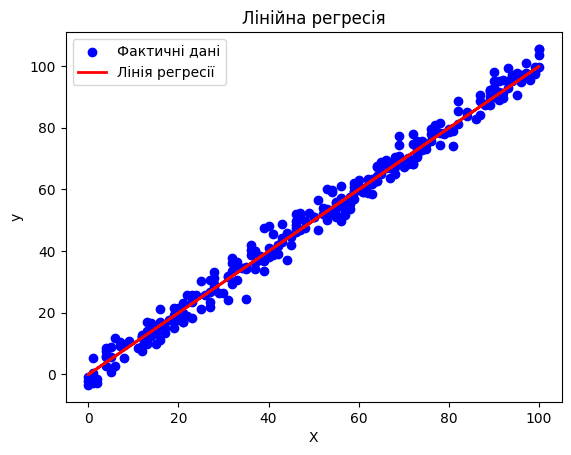

In [26]:
kaggle_data_model = LinearRegression()

gen_data_model.fit(X_kaggle_train, y_kaggle_train)
y_kaggle_pred = gen_data_model.predict(X_kaggle_test)

mse = mean_squared_error(y_kaggle_test, y_kaggle_pred)
mae = mean_absolute_error(y_kaggle_test, y_kaggle_pred)
r2 = r2_score(y_kaggle_test, y_kaggle_pred)

print(f"Середньоквадратична похибка (MSE): {mse}")
print(f"Середня абсолютна похибка (MAE): {mae}")
print(f"Коефіцієнт детермінації (R^2): {r2}")

plt.scatter(X_kaggle_test, y_kaggle_test, color='blue', label='Фактичні дані')
plt.plot(X_kaggle_test, y_kaggle_pred, color='red', linewidth=2, label='Лінія регресії')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Лінійна регресія')
plt.legend()
plt.show()